## mainWeatherPy

#### Maria Barrera -- 02/07/2021

Note: Observations are listed in the readme file.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [4]:
# display cities
cities

['dikson',
 'rikitea',
 'carnarvon',
 'port alfred',
 'ushuaia',
 'saint george',
 'innisfail',
 'taolanaro',
 'nikolskoye',
 'coihaique',
 'lorengau',
 'bredasdorp',
 'mahadday weyne',
 'norman wells',
 'vila velha',
 'taiyuan',
 'hasaki',
 'saldanha',
 'tasiilaq',
 'antofagasta',
 'san fernando',
 'esperance',
 'qurayyat',
 'cape town',
 'aguimes',
 'bethel',
 'mataura',
 'sterling',
 'hermanus',
 'hambantota',
 'atuona',
 'castro',
 'batagay',
 'katsuura',
 'gori',
 'hobart',
 'kodiak',
 'punta arenas',
 'balabac',
 'marcona',
 'georgetown',
 'hilo',
 'sao joao da barra',
 'floro',
 'yellowknife',
 'matara',
 'zwedru',
 'bendigo',
 'ribeira grande',
 'east london',
 'upernavik',
 'pacific grove',
 'xining',
 'vaini',
 'albany',
 'longyearbyen',
 'santiago',
 'busselton',
 'cayenne',
 'kralendijk',
 'khudumelapye',
 'kushiro',
 'lamu',
 'ponta do sol',
 'klaksvik',
 'salalah',
 'quchan',
 'mbandaka',
 'henties bay',
 'moron',
 'kembe',
 'victoria',
 'bani',
 'andreapol',
 'narsaq',
 

In [5]:
# display on 10 cities
# cities[:10]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
### Perform API Calls

####  TEMP for testing only:
city_name= 'yulara'

url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [7]:
url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [8]:
# Pretty print JSON for weather
response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -25.2406,
        "lon": 130.9889
    },
    "dt": 1612812041,
    "id": 6355222,
    "main": {
        "feels_like": 297.61,
        "humidity": 26,
        "pressure": 1006,
        "temp": 302.15,
        "temp_max": 302.15,
        "temp_min": 302.15
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1612817881,
        "sunset": 1612864956,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 5.66
    }
}


In [9]:
# reference only -- # List for holding lat_lngs and cities
# cities = []

lat_lngs = []

for city in cities:
    url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
    response = requests.get(url).json()
    
    try:
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]

        lat_lng = {'latitude':lat,
                   'longitude':long}

        #print("lat", lat, "long", long)
    except:
        continue

    lat_lngs.append(lat_lng)
    
#lat_lngs

In [10]:
# Display 10 items for lat / long
lat_lngs[:10]

[{'latitude': 73.5069, 'longitude': 80.5464},
 {'latitude': -23.1203, 'longitude': -134.9692},
 {'latitude': -24.8667, 'longitude': 113.6333},
 {'latitude': -33.5906, 'longitude': 26.891},
 {'latitude': -54.8, 'longitude': -68.3},
 {'latitude': 37.1041, 'longitude': -113.5841},
 {'latitude': -17.5333, 'longitude': 146.0333},
 {'latitude': 59.7035, 'longitude': 30.7861},
 {'latitude': -45.5752, 'longitude': -72.0662},
 {'latitude': -2.0226, 'longitude': 147.2712}]

In [11]:
# display 10 cities
cities[:10]

['dikson',
 'rikitea',
 'carnarvon',
 'port alfred',
 'ushuaia',
 'saint george',
 'innisfail',
 'taolanaro',
 'nikolskoye',
 'coihaique']

In [12]:
# export the city data to a csv file
import csv

# Specify the file to write to
output_path = "output_data/cities_file.csv"

In [13]:
# full run of cities

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 
                        'Max Temp', 'Wind Speed'])
    
    # read cities file, get all the values from the API response and write rows to the cities_file
    
    for city in cities:
        url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
        response = requests.get(url).json()
        try:
            city_id = response["sys"]["id"]
            cloudiness = response["clouds"]["all"]
            country = response["sys"]["country"]
            date = response["dt"]
            humidity = response["main"]["humidity"]
            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            wind_speed = response["wind"]["speed"]
            
            # Display city data
            print(city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed)
            
            # write to excel output file
            csvwriter.writerow([city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed])
            
        except:
            continue
            

9505 carnarvon 0 AU 1612811945 100 -24.8667 113.6333 298.15 8.23
2011314 port alfred 79 ZA 1612812024 88 -33.5906 26.891 292.59 0.89
8303 ushuaia 0 AR 1612811989 55 -54.8 -68.3 290.15 7.2
5832 saint george 1 US 1612811821 27 37.1041 -113.5841 287.04 1.54
8926 nikolskoye 0 RU 1612812012 84 59.7035 30.7861 255.93 1
8491 coihaique 0 CL 1612811839 25 -45.5752 -72.0662 303.15 2.57
1966 bredasdorp 5 ZA 1612811743 78 -34.5322 20.0403 294.15 3.6
951 norman wells 1 CA 1612812062 68 65.282 -126.8329 237.15 3.6
8474 vila velha 90 BR 1612812052 94 -20.3297 -40.2925 299.26 1.55
9616 taiyuan 0 CN 1612812334 68 37.8694 112.5603 267.15 0.6
7955 hasaki 20 JP 1612812011 44 35.7333 140.8333 274.15 7.72
1943 saldanha 0 ZA 1612812067 73 -33.0117 17.9442 294.15 8.75
81 tasiilaq 75 GL 1612812009 63 65.6145 -37.6368 268.15 7.2
8488 antofagasta 20 CL 1612812447 64 -23.65 -70.4 295.93 6.69
8152 san fernando 75 PH 1612812336 78 15.0286 120.6898 297.15 2.06
9525 esperance 0 AU 1612812043 88 -33.8667 121.9 290.15 

1029 inuvik 100 CA 1612812422 67 68.3499 -133.7218 235.15 2.06
3444 golden 75 US 1612812150 58 39.7555 -105.2211 279.26 4.12
9587 kununurra 75 AU 1612812562 100 -15.7667 128.7333 298.15 3.09
7317 isangel 20 VU 1612812668 100 -19.55 169.2667 295.15 2.34
6761 copparo 75 IT 1612812426 76 44.893 11.8249 283.15 1.43
4794 grandview 90 US 1612812427 85 38.8858 -94.533 260.15 4.12
60994 hakui 100 JP 1612812428 82 36.8833 136.7833 273.71 4.24
8452 touros 0 BR 1612812522 62 -5.1989 -35.4608 303.15 9.26
7868 makakilo city 20 US 1612812429 57 21.3469 -158.0858 297.15 5.14
7684 fairbanks 1 US 1612812627 76 64.8378 -147.7164 245.15 3.09
2003464 cuorgne 12 IT 1612812430 75 45.3895 7.6499 278.71 1.69
4588 jamestown 90 US 1612812472 58 42.097 -79.2353 268.15 4.63
4747 lompoc 90 US 1612811976 82 34.6391 -120.4579 285.15 1.54
7649 barrow 1 US 1612812521 84 71.2906 -156.7887 236.15 5.66
2208 quelimane 20 MZ 1612812432 65 -17.8786 36.8883 302.15 2.57
8480 calama 0 CL 1612812432 29 -22.4667 -68.9333 297.15 

6710 siderno 20 IT 1612812526 62 38.2779 16.302 287.59 3.09
8244 san luis 75 AR 1612812435 88 -33.295 -66.3356 289.15 6.17
8415 mazagao 75 BR 1612812531 100 -0.115 -51.2894 298.15 5.66
9372 labuan 20 MY 1612812531 94 5.2767 115.2417 298.15 3.01
465 rocky mountain house 98 CA 1612812232 70 52.3668 -114.9188 247.15 4.12
9613 whyalla 0 AU 1612812532 77 -33.0333 137.5833 289.15 2.06
2005582 boz 100 FR 1612812532 90 46.4071 4.9109 277.04 0.45
2011529 mantua 0 IT 1612812533 77 45.1667 10.7833 282.59 2.24
9314 tan an 75 VN 1612812534 94 10.5333 106.4167 298.15 0.51
2020742 margate 100 GB 1612812535 70 51.3813 1.3862 272.04 1.79
9031 kursk 0 RU 1612812535 67 51.7303 36.1939 261.15 7
782 flin flon 90 CA 1612812536 63 54.7682 -101.865 243.15 4.12
2016515 luqiao 100 CN 1612812537 59 28.5808 121.3772 282.04 3.51
7103 acapulco 1 MX 1612812394 58 16.8634 -99.8901 303.15 5.66
9432 pekan 20 MY 1612812540 88 3.4836 103.3996 297.15 2.06
7112 jaumave 40 MX 1612812541 39 23.4167 -99.3833 301.15 6.17
1696 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Cities data file
cities_data_path = "output_data/cities_file.csv"
cities_data_path

# read the cities file and put in a pandas dataframe
cities_df = pd.read_csv(cities_data_path)
cities_df.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,9505,carnarvon,0,AU,1612811945,100,-24.8667,113.6333,298.15,8.23
1,2011314,port alfred,79,ZA,1612812024,88,-33.5906,26.8910,292.59,0.89
2,8303,ushuaia,0,AR,1612811989,55,-54.8000,-68.3000,290.15,7.20
3,5832,saint george,1,US,1612811821,27,37.1041,-113.5841,287.04,1.54
4,8926,nikolskoye,0,RU,1612812012,84,59.7035,30.7861,255.93,1.00


In [15]:
#  temperature conversion & column update

new_df = cities_df

# for testing only ---------------
# maxtemp = 294.26
# temp_f = (maxtemp - 273.15) * 9/5 +32
# temp_f
# --------------------------------

for ind in new_df.index: 
    maxtemp = new_df['Max Temp'][ind]
    temp_f = (maxtemp - 273.15) * 9/5 +32
    new_df['Max Temp'][ind] = temp_f
    
    # for testing only
    #print(temp_f)
    #print(new_df['Max Temp'][ind], ind) 
    
new_df.head()

<ipython-input-15-8d8f6c037661>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Max Temp'][ind] = temp_f


,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,9505,carnarvon,0,AU,1612811945,100,-24.8667,113.6333,77.000,8.23
1,2011314,port alfred,79,ZA,1612812024,88,-33.5906,26.8910,66.992,0.89
2,8303,ushuaia,0,AR,1612811989,55,-54.8000,-68.3000,62.600,7.20
3,5832,saint george,1,US,1612811821,27,37.1041,-113.5841,57.002,1.54
4,8926,nikolskoye,0,RU,1612812012,84,59.7035,30.7861,1.004,1.00


In [16]:
#testing
#new_df[.to_datetime('1612595343', format='%Y%m%d', errors='ignore')
       
#df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d') 
#new_df['Date'] = pd.to_datetime(new_df['Date'], format='%y%m%d', errors='ignore')

#new_df['Date'] = pd.to_datetime(new_df['Date'][0], format='%y%m%d', errors='ignore')
#new_df['Date'] = pd.to_datetime(1612595343, format='%y%m%d', errors='ignore')
#new_df       

#cities_df['Date'][0].Date(levels(data$x), format="%d.%m.%Y")
#cities_df['Date'][0].Date(1612595343, format="%d.%m.%Y")
#x=cities_df['Date'][0]
#x
date='04/01/20'

In [17]:
# create a subset -- for testing only
subset_cities_df = cities_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
subset_cities_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,-24.8667,113.6333,77.000,100,0,8.23,AU,1612811945
1,-33.5906,26.8910,66.992,88,79,0.89,ZA,1612812024
2,-54.8000,-68.3000,62.600,55,0,7.20,AR,1612811989
3,37.1041,-113.5841,57.002,27,1,1.54,US,1612811821
4,59.7035,30.7861,1.004,84,0,1.00,RU,1612812012


In [18]:
# Describe the dataframe
subset_cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,3.070000e+02
mean,20.657510,-13.234508,50.930782,68.635179,41.986971,3.945309,1.612812e+09
std,34.354646,90.186049,31.430286,19.957237,37.338670,2.705053,2.237666e+02
min,-54.800000,-175.200000,-41.800000,9.000000,0.000000,0.450000,1.612812e+09
25%,-9.637100,-80.974000,30.200000,58.000000,1.000000,2.060000,1.612812e+09
50%,31.463800,-20.273400,59.000000,70.000000,40.000000,3.600000,1.612812e+09
75%,46.420200,44.972950,77.000000,84.000000,75.000000,5.140000,1.612813e+09
max,78.218600,177.483300,93.200000,100.000000,100.000000,18.520000,1.612813e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
cities_humidity_gt_100_df = cities_df[cities_df["Humidity"] >= 100]
cities_humidity_gt_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,9505,carnarvon,0,AU,1612811945,100,-24.8667,113.6333,77.000,8.23
85,8915,sadove,90,UA,1612812385,100,46.2487,30.1795,35.600,9.00
129,9366,kuching,20,MY,1612812420,100,1.5500,110.3333,75.200,1.03
133,9587,kununurra,75,AU,1612812562,100,-15.7667,128.7333,77.000,3.09
134,7317,isangel,20,VU,1612812668,100,-19.5500,169.2667,71.600,2.34
148,719,bonavista,100,CA,1612812676,100,48.6499,-53.1147,30.992,3.60
192,73730,vila nova de milfontes,4,PT,1612812461,100,37.7238,-8.7828,55.004,0.89
200,9412,kabanjahe,72,ID,1612812300,100,3.1001,98.4908,75.200,1.54
264,8415,mazagao,75,BR,1612812531,100,-0.1150,-51.2894,77.000,5.66
306,8838,qovlar,90,AZ,1612812811,100,40.9480,45.7350,37.400,2.06


In [20]:
# Inspect the data and remove the cities where the humidity > 100%

cities_humidity_le_100_df = cities_df

index_names = cities_humidity_le_100_df[ cities_humidity_le_100_df['Humidity'] > 100].index 
  
# drop these row indexes from dataFrame 
cities_humidity_le_100_df.drop(index_names, inplace = True) 
cities_humidity_le_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,9505,carnarvon,0,AU,1612811945,100,-24.8667,113.6333,77.000,8.23
1,2011314,port alfred,79,ZA,1612812024,88,-33.5906,26.8910,66.992,0.89
2,8303,ushuaia,0,AR,1612811989,55,-54.8000,-68.3000,62.600,7.20
3,5832,saint george,1,US,1612811821,27,37.1041,-113.5841,57.002,1.54
4,8926,nikolskoye,0,RU,1612812012,84,59.7035,30.7861,1.004,1.00
...,...,...,...,...,...,...,...,...,...,...
302,8587,san cristobal,40,VE,1612812806,48,7.7669,-72.2250,89.600,5.14
303,8368,itaituba,40,BR,1612812568,66,-4.2761,-55.9836,87.800,2.06
304,2434,atar,0,MR,1612812807,12,20.5169,-13.0499,80.600,3.09
305,8675,pucallpa,40,PE,1612812572,58,-8.3791,-74.5539,89.600,3.09


In [21]:
# Get the indices of cities that have humidity over 100%.
index_cities_humid_over100 = cities_df[ cities_df['Humidity'] > 100].index 
index_cities_humid_over100

Int64Index([], dtype='int64')

In [22]:
cities_df[ cities_df['Humidity'] > 100]

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [23]:
#### DO NOT RUN -- display for sample reference only
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs Temperature Plot

<function matplotlib.pyplot.close(fig=None)>

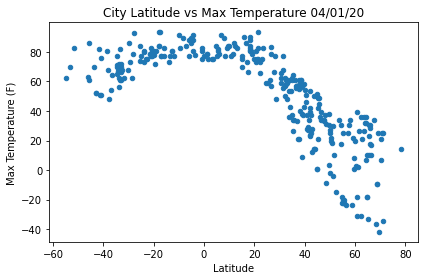

In [24]:
#### scatter plot using pandas --LATITUDE vs TEMPERATURE

cities_df.plot(kind="scatter", x='Lat', y='Max Temp')

plt.title("City Latitude vs Max Temperature " + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Temp_plot.png")

#plt.legend()
plt.close

# Latitude vs Humidity Plot

<function matplotlib.pyplot.close(fig=None)>

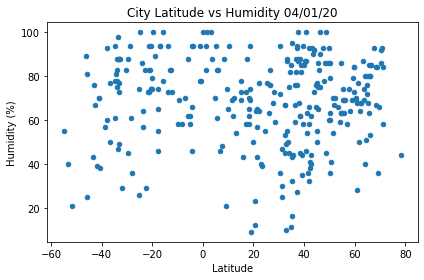

In [25]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Humidity')

# Set a Title and labels
plt.title("City Latitude vs Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

#plt.legend()
plt.close

# Latitude vs Cloudiness Plot

<function matplotlib.pyplot.close(fig=None)>

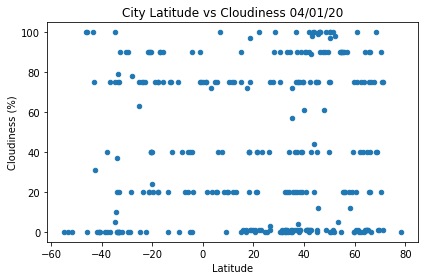

In [26]:
#### scatter plot using pandas -- Latitude vs Cloudiness

cities_df.plot(kind="scatter", x='Lat', y='Cloudiness')

# Set a Title and labels
plt.title("City Latitude vs Cloudiness " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Cloudiness_plot.png")

#plt.legend()
plt.close

# Latitude vs Wind Speed Plot

<function matplotlib.pyplot.close(fig=None)>

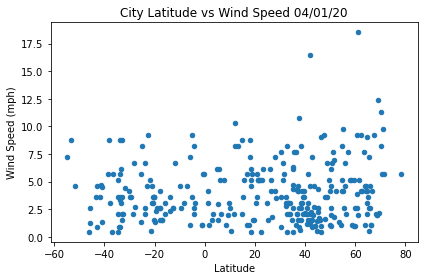

In [27]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Wind Speed')

# Set a Title and labels
plt.title("City Latitude vs Wind Speed " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_WindSpeed_plot.png")

#plt.legend()
plt.close

# Northern Hemisphere & Southern Hemisphere

#### Northern Hemipshere:  >= 0 degrees latitude
#### Southern Hemisphere:   < 0 degrees latitude

In [28]:
nor_hem_df=cities_df[ cities_df['Lat'] >= 0]
nor_hem_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,5832,saint george,1,US,1612811821,27,37.1041,-113.5841,57.002,1.54
4,8926,nikolskoye,0,RU,1612812012,84,59.7035,30.7861,1.004,1.00
7,951,norman wells,1,CA,1612812062,68,65.2820,-126.8329,-32.800,3.60
9,9616,taiyuan,0,CN,1612812334,68,37.8694,112.5603,21.200,0.60
10,7955,hasaki,20,JP,1612812011,44,35.7333,140.8333,33.800,7.72
...,...,...,...,...,...,...,...,...,...,...
300,80250,sfantu gheorghe,100,RO,1612812565,83,45.8667,25.7833,48.992,1.48
301,7164,rosarito,1,MX,1612812369,67,32.3333,-117.0333,57.200,2.75
302,8587,san cristobal,40,VE,1612812806,48,7.7669,-72.2250,89.600,5.14
304,2434,atar,0,MR,1612812807,12,20.5169,-13.0499,80.600,3.09


In [29]:
sou_hem_df=cities_df[ cities_df['Lat'] < 0]
sou_hem_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,9505,carnarvon,0,AU,1612811945,100,-24.8667,113.6333,77.000,8.23
1,2011314,port alfred,79,ZA,1612812024,88,-33.5906,26.8910,66.992,0.89
2,8303,ushuaia,0,AR,1612811989,55,-54.8000,-68.3000,62.600,7.20
5,8491,coihaique,0,CL,1612811839,25,-45.5752,-72.0662,86.000,2.57
6,1966,bredasdorp,5,ZA,1612811743,78,-34.5322,20.0403,69.800,3.60
...,...,...,...,...,...,...,...,...,...,...
290,8360,imbituba,20,BR,1612812553,61,-28.2400,-48.6703,78.800,6.69
292,9384,cilegon,40,ID,1612812554,88,-6.0174,106.0538,77.000,1.03
293,7348,christchurch,100,NZ,1612812543,43,-43.5333,172.6333,69.800,3.60
303,8368,itaituba,40,BR,1612812568,66,-4.2761,-55.9836,87.800,2.06


In [30]:
# Latitude vs. Temperature Plot -- All Latitudes
lat=cities_df['Lat']
lat

0     -24.8667
1     -33.5906
2     -54.8000
3      37.1041
4      59.7035
        ...   
302     7.7669
303    -4.2761
304    20.5169
305    -8.3791
306    40.9480
Name: Lat, Length: 307, dtype: float64

In [31]:
# split for Northern Hemisphere & Southern Hemisphere
n_lat = nor_hem_df['Lat']
n_lat    

3      37.1041
4      59.7035
7      65.2820
9      37.8694
10     35.7333
        ...   
300    45.8667
301    32.3333
302     7.7669
304    20.5169
306    40.9480
Name: Lat, Length: 215, dtype: float64

In [32]:
# get latitude min & max for x axis
min_n_lat = n_lat.min()
min_n_lat

1.2897

In [33]:
max_n_lat = n_lat.max()
max_n_lat

78.2186

In [34]:
# split for Northern Hemisphere & Southern Hemisphere
s_lat = sou_hem_df['Lat']
s_lat  

0     -24.8667
1     -33.5906
2     -54.8000
5     -45.5752
6     -34.5322
        ...   
290   -28.2400
292    -6.0174
293   -43.5333
303    -4.2761
305    -8.3791
Name: Lat, Length: 92, dtype: float64

In [35]:
# get latitude min & max for x axis
min_s_lat = s_lat.min()
min_s_lat

-54.8

In [36]:
max_s_lat = s_lat.max()
max_s_lat

-0.115

In [37]:
n_temp=nor_hem_df['Max Temp']
n_temp

3      57.002
4       1.004
7     -32.800
9      21.200
10     33.800
        ...  
300    48.992
301    57.200
302    89.600
304    80.600
306    37.400
Name: Max Temp, Length: 215, dtype: float64

In [38]:
# get Temperature min & max for y axis -- NORTHERN HEMISPHERE
min_n_temp = n_temp.min()
min_n_temp

-41.799999999999955

In [39]:
max_n_temp = n_temp.max()
max_n_temp

93.2

In [40]:
# get Temperature min & max for y axis -- SOUTHERN HEMISPHERE
s_temp=sou_hem_df['Max Temp']
s_temp

0      77.000
1      66.992
2      62.600
5      86.000
6      69.800
        ...  
290    78.800
292    77.000
293    69.800
303    87.800
305    89.600
Name: Max Temp, Length: 92, dtype: float64

In [41]:
# get Temperatrue min & max for y axis
min_s_temp = s_temp.min()
min_s_temp

48.2

In [42]:
max_s_temp = s_temp.max()
max_s_temp

93.2

# Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
# create the scatter plot - line -- Northern Hemisphere
# Dependencies

from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
temps = nor_hem_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(-0.8318761664310614, 2.2092361782498696e-56)

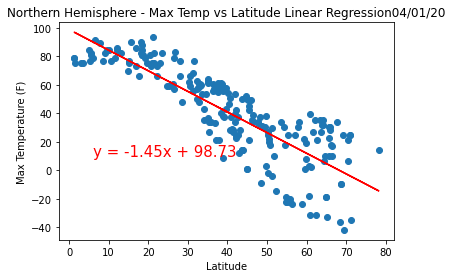

In [44]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression" + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/N_Lat_vs_Temp_with_line_plot.png")

plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [45]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
temps = sou_hem_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(0.6109133614104867, 1.0008361982040778e-10)

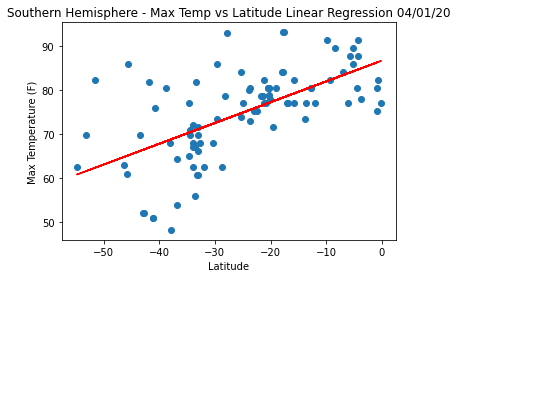

In [46]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/N_Lat_vs_Temp_with_line_plot.png")

plt.show()

#### Nothern Hemisphere Humidity

In [47]:
temp_nor_hum = nor_hem_df['Humidity']
temp_nor_hum

3       27
4       84
7       68
9       68
10      44
      ... 
300     83
301     67
302     48
304     12
306    100
Name: Humidity, Length: 215, dtype: int64

In [48]:
# get Temperatrue min & max for y axis
min_nor_humidity = temp_nor_hum.min()
min_nor_humidity

9

In [49]:
max_nor_humidity = temp_nor_hum.max()
max_nor_humidity

100

#### Southern Hemisphere Humidity

In [50]:
temp_sou_hum = sou_hem_df['Humidity']
temp_sou_hum

0      100
1       88
2       55
5       25
6       78
      ... 
290     61
292     88
293     43
303     66
305     58
Name: Humidity, Length: 92, dtype: int64

In [51]:
# get Temperatrue min & max for y axis
min_sou_humidity = temp_sou_hum.min()
min_sou_humidity

21

In [52]:
max_sou_humidity = temp_sou_hum.max()
max_sou_humidity

100

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [53]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
hums = nor_hem_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(0.08399294342634205, 0.21998524876570477)

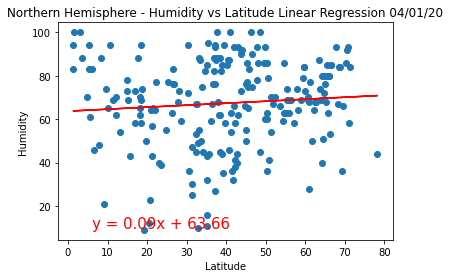

In [54]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/N_Lat_vs_Humidity_with_line_plot.png")

plt.show()

In [55]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.08399294342634206


#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [56]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
hums = sou_hem_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(0.2864783300479563, 0.005631272280898693)

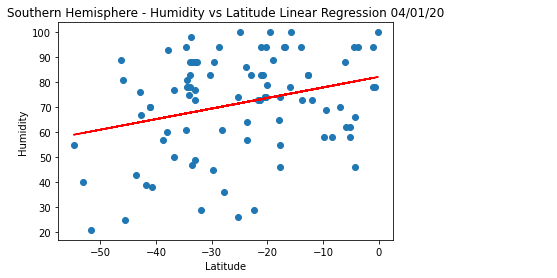

In [57]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
 
plt.savefig("Images/S_Lat_vs_Humidity_with_line_plot.png")

plt.show()

In [58]:
line_eq 

'y = 0.42x + 82.17'

In [59]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.2864783300479564


#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [60]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
clouds = nor_hem_df['Cloudiness']

correlation = st.pearsonr(lats, clouds)
correlation

(0.058049613246056994, 0.39703587090672243)

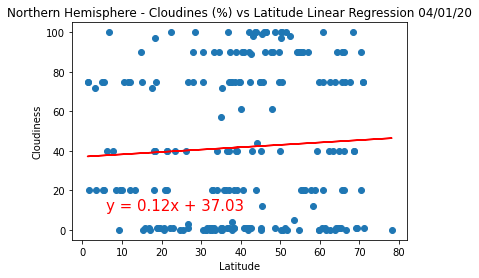

In [61]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Cloudines (%) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/N_Cloudat_vs_Humidity_with_line_plot.png")

plt.show()

In [62]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.05804961324605699


#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [63]:
#create the scatter plot - line -- Southern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
clouds = sou_hem_df['Cloudiness']

correlation = st.pearsonr(lats, clouds)
correlation

(0.20941075160931794, 0.045133694491412316)

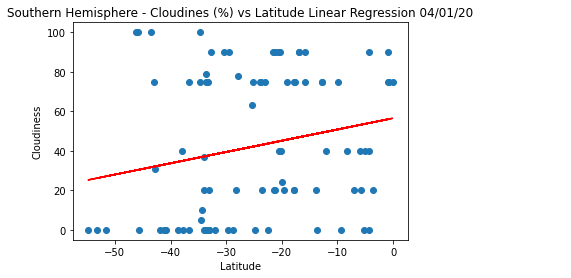

In [64]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Cloudines (%) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/N_Cloud_vs_Humidity_with_line_plot.png")

plt.show()

In [65]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.20941075160931777


#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [66]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
winds = nor_hem_df['Wind Speed']

correlation = st.pearsonr(lats, winds)
correlation

(0.11094105663550415, 0.10475116495268531)

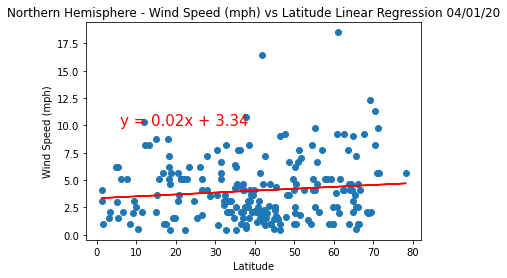

In [67]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/N_WindSpeed_vs_Lat_with_line_plot.png")

plt.show()

In [68]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.1109410566355041


#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [69]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
winds = sou_hem_df['Wind Speed']

correlation = st.pearsonr(lats, winds)
correlation

(-0.05299652305746699, 0.6158592474478369)

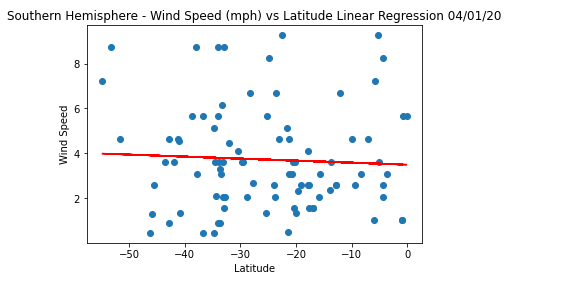

In [70]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Images/N_WindSpeed_vs_Lat_with_line_plot.png")

plt.show()

In [71]:
print("The r-value: is: ", rvalue)

The r-value: is:  -0.05299652305746697
